## HSV変換

In [34]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[[[ 36 125 132]
  [ 37 159 104]
  [ 38 163 100]
  ...
  [149  96 175]
  [ 38 121 134]
  [ 42  98 163]]

 [[ 37 125 140]
  [ 36 141 117]
  [ 33 141 106]
  ...
  [ 32  60 177]
  [ 37  76 176]
  [ 39 102 152]]

 [[ 37 126 137]
  [ 35 126 131]
  [ 33 126 119]
  ...
  [ 33  72 207]
  [ 38  80 232]
  [ 38 125 161]]

 ...

 [[ 37  87 231]
  [ 36 121 153]
  [ 34 100 160]
  ...
  [ 37 164 107]
  [ 40 159 101]
  [ 42 156  93]]

 [[ 38  79 255]
  [ 37 114 172]
  [ 35  97 168]
  ...
  [ 35 156 150]
  [ 38 180 119]
  [ 39 179 112]]

 [[ 38 100 214]
  [ 38 106 187]
  [ 35  92 176]
  ...
  [ 37 125 185]
  [ 40 135 151]
  [ 42 169 116]]]


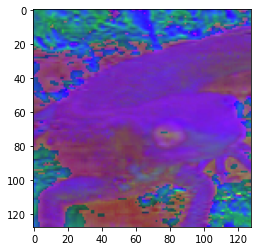

In [35]:
#BGR -> HSV

def BGR2HSV(_img):
    # 各画素の値を0-1に収めるため
    img = _img.copy()/255.
    
    hsv = np.zeros_like(img, dtype=np.float32)
    
    # get max and min
    # 各画素のRGBの中で最小,最大の値を持つものを求めている
    max_v = np.max(img,axis=2)
    min_v = np.min(img,axis=2)
    min_arg = np.argmin(img, axis=2)  # min_vを実現する添字（RGBを表す）を返す
    
    # H
    hsv[:,:,0][np.where(max_v==min_v)]=0
    # if min == B
    ind = np.where(min_arg==0)
    hsv[:,:,0][ind] = 60*(img[:,:,2][ind] - img[:,:,1][ind])/(max_v[ind] - min_v[ind]) 
    # if min == R
    ind = np.where(min_arg==2)
    hsv[:,:,0][ind] = 60*(img[:,:,1][ind] - img[:,:,0][ind])/(max_v[ind] - min_v[ind]) + 120
    # if min == G
    ind = np.where(min_arg==1)
    hsv[:,:,0][ind] = 60*(img[:,:,0][ind] - img[:,:,2][ind])/(max_v[ind] - min_v[ind]) + 240
    # if hsv[:,:,0]<0:
    ind = np.where(hsv[:,:,0]<0)
    hsv[:,:,0][ind] += 360
    
    # S
    hsv[:,:,1] = (max_v.copy() - min_v.copy())/max_v
    
    # V
    hsv[:,:,2] = max_v.copy()
    
    hsv[:,:,0] = hsv[:,:,0]*0.5
    hsv[:,:,1] = hsv[:,:,1]*255
    hsv[:,:,2] = hsv[:,:,2]*255
    hsv = hsv.astype('uint8')
    
    return hsv
    
img = cv2.imread('../imori.jpg')
hsv = BGR2HSV(img)

# cv2のHSV変換に揃えるために


print(hsv)

plt.imshow(hsv)




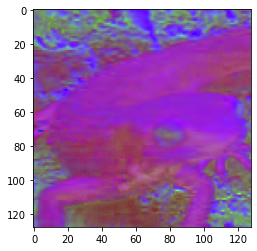

In [36]:
img = cv2.imread('../imori.jpg')
hsv2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv2)
# openCVメソッドの場合はHueが[0,179], Saturation[0,255], Valueは[0,255]の範囲になる

In [27]:
# 画像が完全に一致はしないがだいたいやっていることは一緒なのだろう。

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


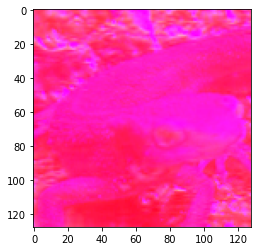

In [38]:
#BGR -> HSV

def BGR2HSV(_img):
    # 各画素の値を0-1に収めるため
    img = _img.copy()/255.
    
    hsv = np.zeros_like(img, dtype=np.float32)
    
    # get max and min
    # 各画素のRGBの中で最小,最大の値を持つものを求めている
    max_v = np.max(img,axis=2).copy()
    min_v = np.min(img,axis=2).copy()
    min_arg = np.argmin(img, axis=2)  # min_vを実現する添字（RGBを表す）を返す
    
    # H
    hsv[:,:,0][np.where(max_v==min_v)]=0
    # if min == B
    ind = np.where(min_arg==0)
    hsv[:,:,0][ind] = 60*(img[:,:,1][ind] - img[:,:,2][ind])/(max_v[ind] - min_v[ind]) + 60
    # if min == R
    ind = np.where(min_arg==2)
    hsv[:,:,0][ind] = 60*(img[:,:,0][ind] - img[:,:,1][ind])/(max_v[ind] - min_v[ind]) + 180
    # if min == G
    ind = np.where(min_arg==1)
    hsv[:,:,0][ind] = 60*(img[:,:,2][ind] - img[:,:,0][ind])/(max_v[ind] - min_v[ind]) + 300
    # if hsv[:,:,0]<0:
    #ind = np.where(hsv[:,:,0]<0)
    #hsv[:,:,0][ind] += 360
    
    # S
    hsv[:,:,1] = max_v.copy() - min_v.copy() #/max_v
    
    # V
    hsv[:,:,2] = max_v.copy()
    
    #hsv[:,:,0] = hsv[:,:,0]*0.5
    #hsv[:,:,1] = hsv[:,:,1]*255
    #hsv[:,:,2] = hsv[:,:,2]*255
    #hsv = hsv.astype('uint8')
    
    return hsv
    
img = cv2.imread('../imori.jpg')
hsv = BGR2HSV(img)

cv2.imwrite('out5.jpg', hsv)
plt.imshow(hsv)

## HSV→RGB変換

In [ ]:
# HSV → RGB

#def HSV2RGB(_img, hsv):
 #   rgb = np.zeros_like(hsv, dtype=np.float32)
  #  C = hsv[:,:,1]
   # H = hsv[:,:,0] / 60
   # X = C*(1-np.absolute(H%2-1))

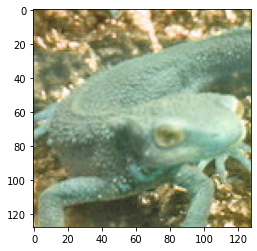

In [42]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def HSV2BGR(_img, hsv):
    img = _img.copy() / 255.
    # get max and min
    max_v = np.max(img, axis=2).copy()
    min_v = np.min(img, axis=2).copy()
    
    out = np.zeros_like(img)
    
    H = hsv[:,:,0]
    S = hsv[:,:,1]
    V = hsv[:,:,2]
    
    C = S
    H_ = H/60.
    X = C*(1-np.abs(H_%2-1))
    Z = np.zeros_like(H)  # (128*128)
    
    vals = [[C,X,Z],[X,C,Z],[Z,C,X],[Z,X,C],[X,Z,C],[C,Z,X]]
    
    # H_の各範囲に対応する処理
    for i in range(6):
        ind = np.where((i<=H_)&(H_<(i+1)))
        out[:,:,0][ind] = (V-C)[ind] + vals[i][0][ind]  # R
        out[:,:,1][ind] = (V-C)[ind] + vals[i][1][ind]  # G
        out[:,:,2][ind] = (V-C)[ind] + vals[i][2][ind]  # B
    
    # Hがゼロの場合（色相がRGB全てで同じ時）
    out[np.where(max_v==min_v)] = 0
    out = np.clip(out, 0, 1)
    out = (out*255).astype(np.uint8)
    
    return out

# Read image
img = cv2.imread('../imori.jpg')

# RGB→HSV
hsv = BGR2HSV(img)

# Transpose Hue
# 360を超えた部分は0-360以内に戻ってくるように調節
hsv[:,:,0] = (hsv[:,:,0]+180) % 360

# HSV→RGB
out = HSV2BGR(img, hsv)

# save result
cv2.imwrite('out5-2.jpg', out)
plt.imshow(out)

    